## Basball Case Study
Problem statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [2]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings ('ignore')

In [3]:
data = pd.read_csv('baseball.csv')

In [4]:
data.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
data.shape

(30, 17)

16 features and 1 target variable (W).

In [6]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Target is int64 (as is every feature except 'ERA') - As a result, I will decide to use a regression model. 

In [8]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values.

In [11]:
#checking the unique values
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [9]:
data.nunique().sum()

419

In [12]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

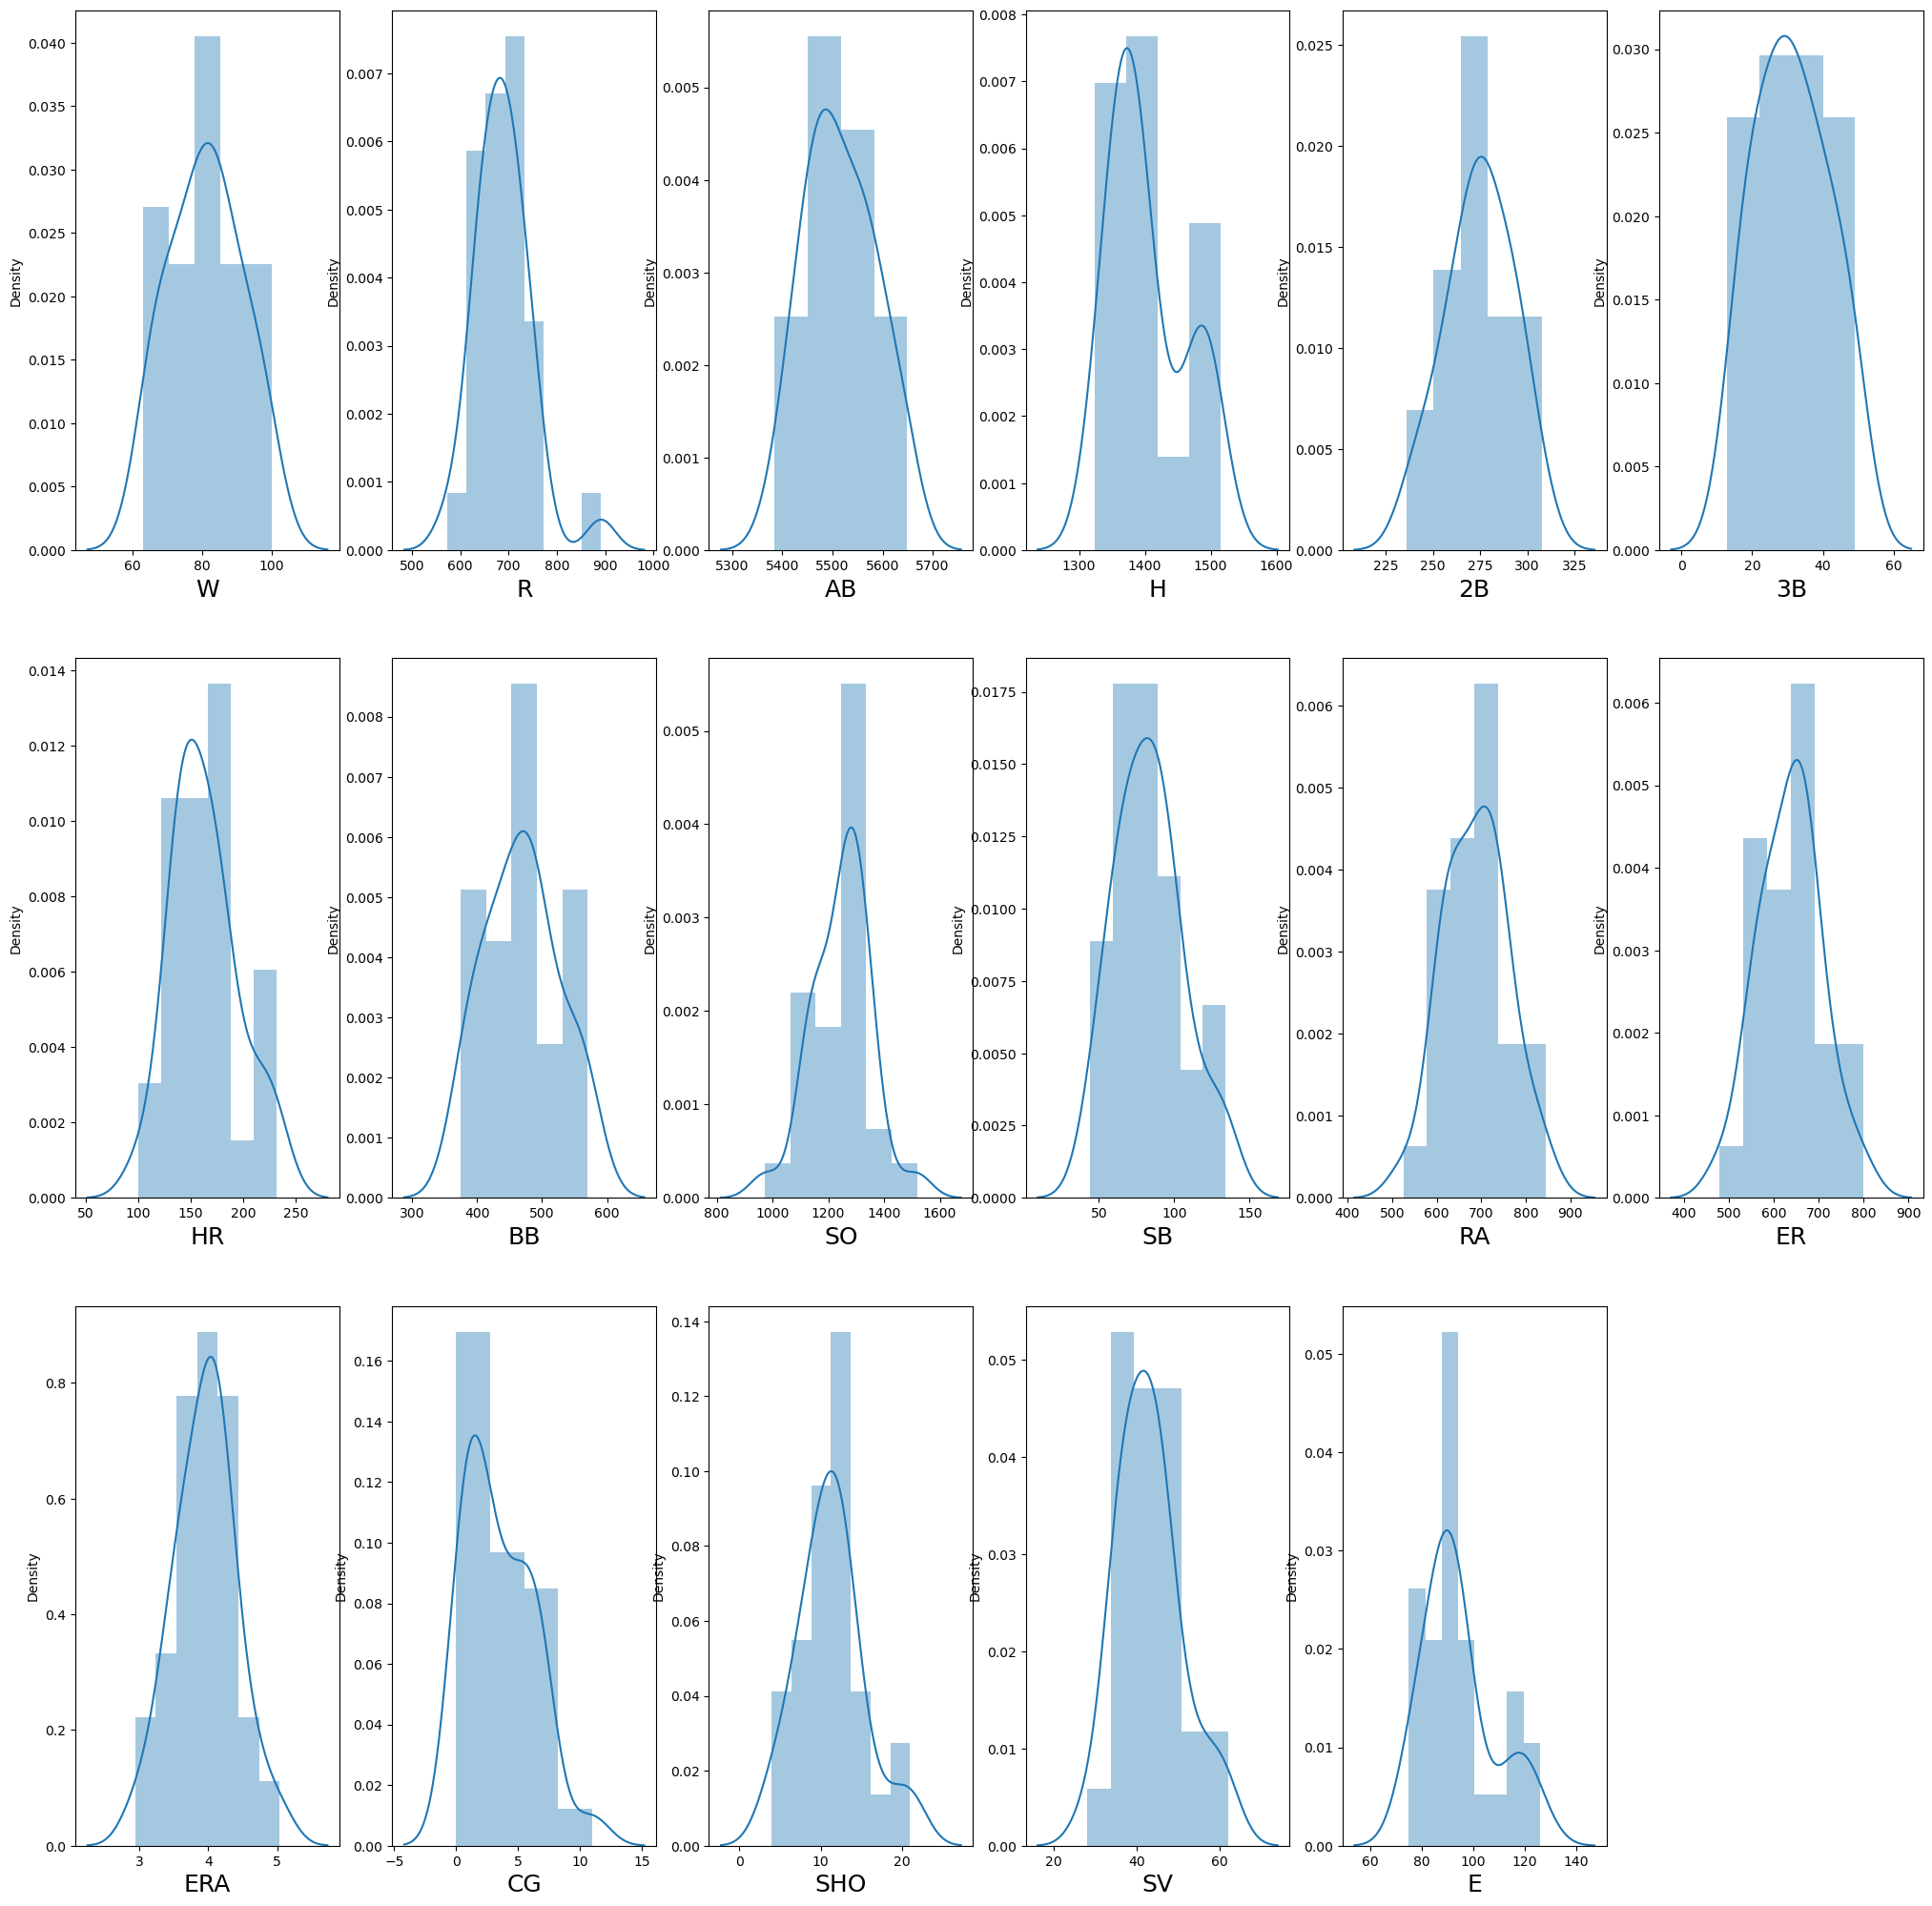

In [15]:
#Use distplots to check distribution of the data
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 18:
        ax = plt.subplot(3, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


Most data has normal distribution, with the exception of 'R', 'H', 'CG' and 'E' which are all skewed negatively. 

In [17]:
#Confirming skewness
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

This shows that 'SV' and 'SHO' are also skewed.

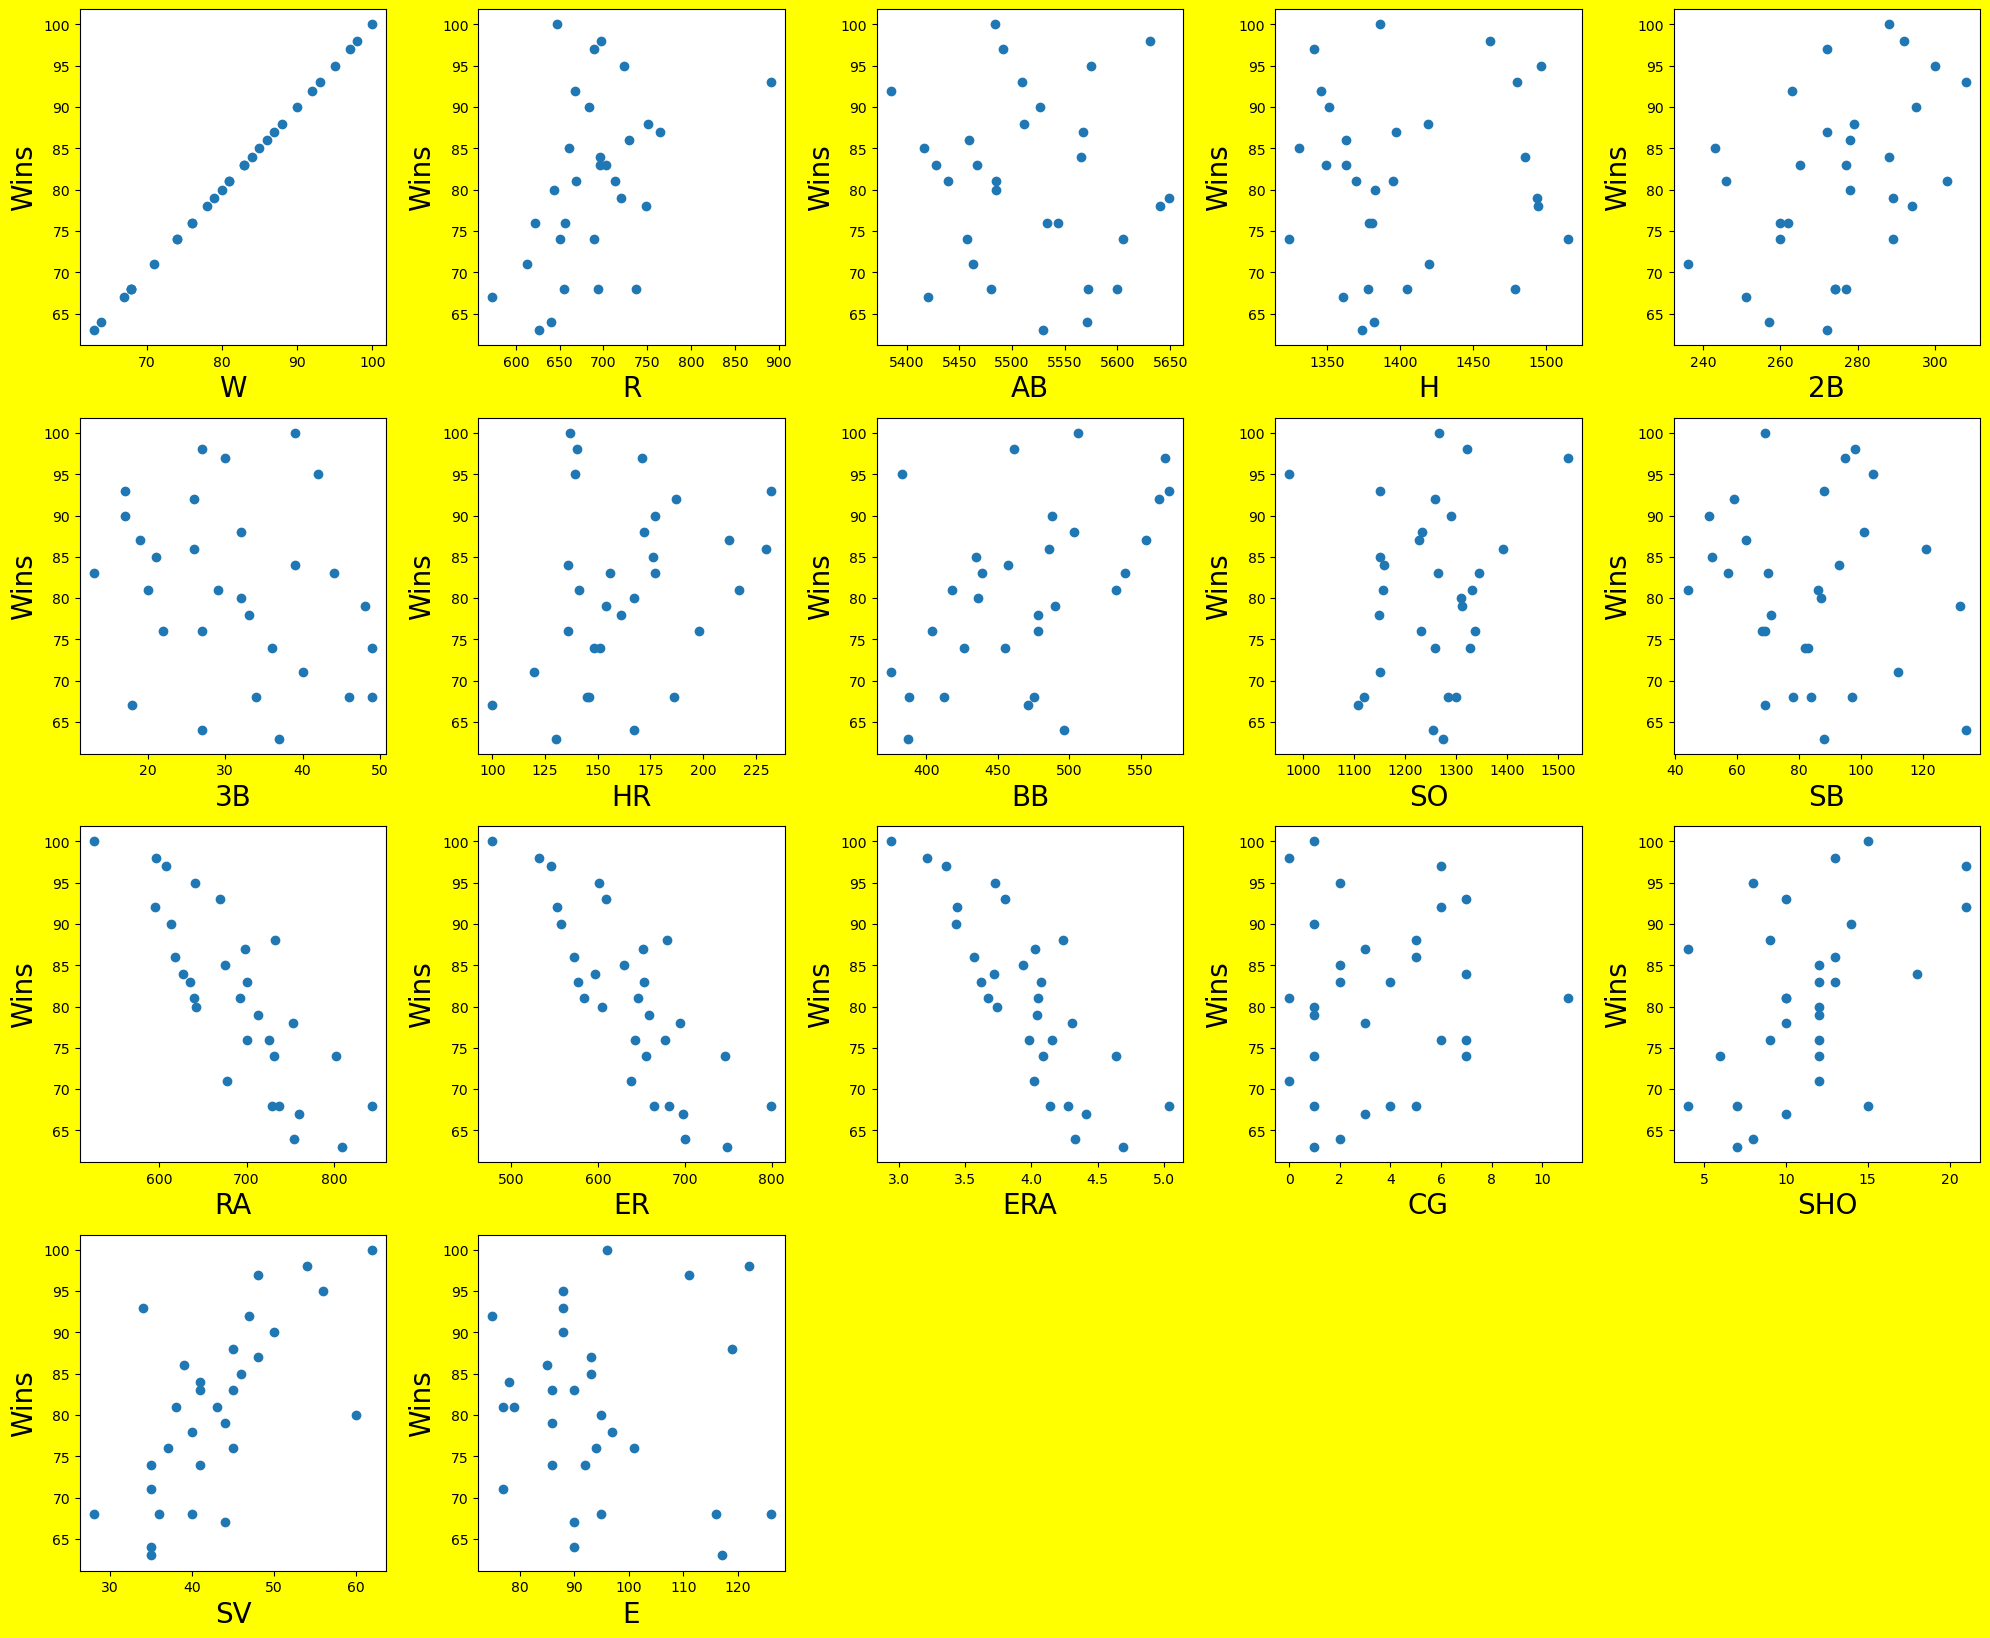

In [19]:
#Exploring relationship between features and target
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber <=20:
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter (x=data[column], y=data['W'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel ('Wins', fontsize=20)
        plotnumber +=1
        plt.tight_layout()

'SV', 'ER', 'ERA', 'RA', 'R' appear to have a linear relationship with target. 

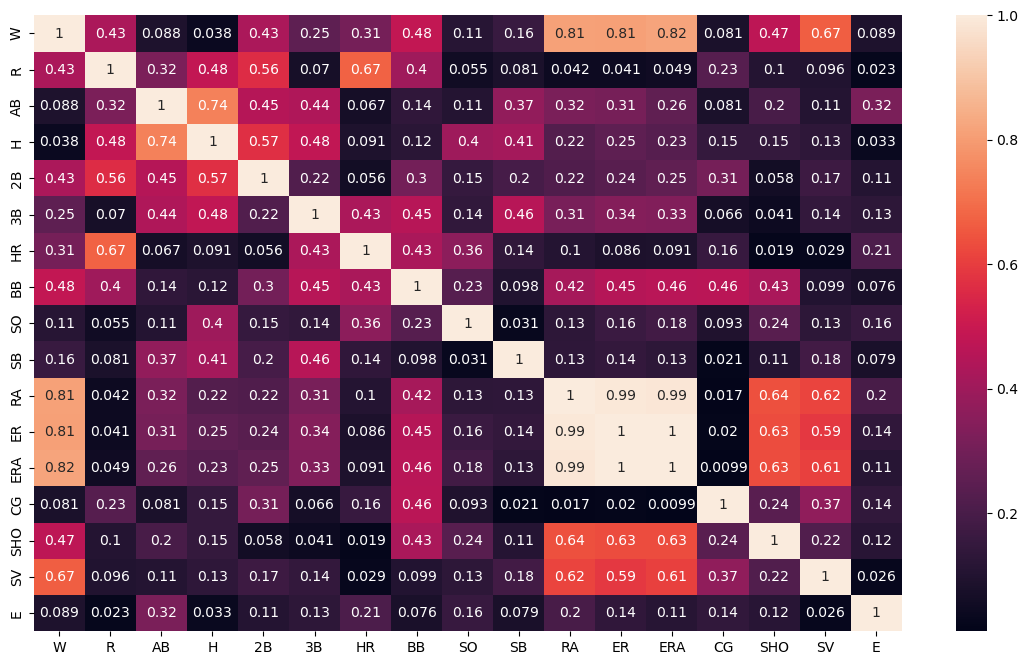

In [20]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

SV, SHO, ERA, ER, RA and BB show high correlation with target. E, CG, H and AB show the least amount of correlation. It looks like some features are highly correlated and may make a multicollinearity issue. 

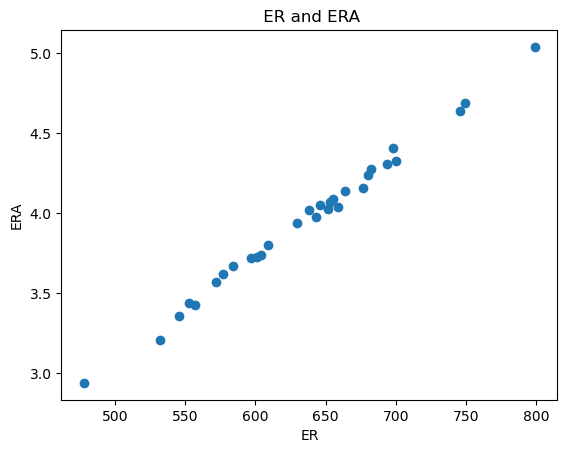

In [35]:
plt.scatter(data['ER'], data['ERA'])
plt.xlabel('ER')
plt.ylabel('ERA')
plt.title(' ER and ERA')
plt.show()

Features dependent on one another, may remove ER. 

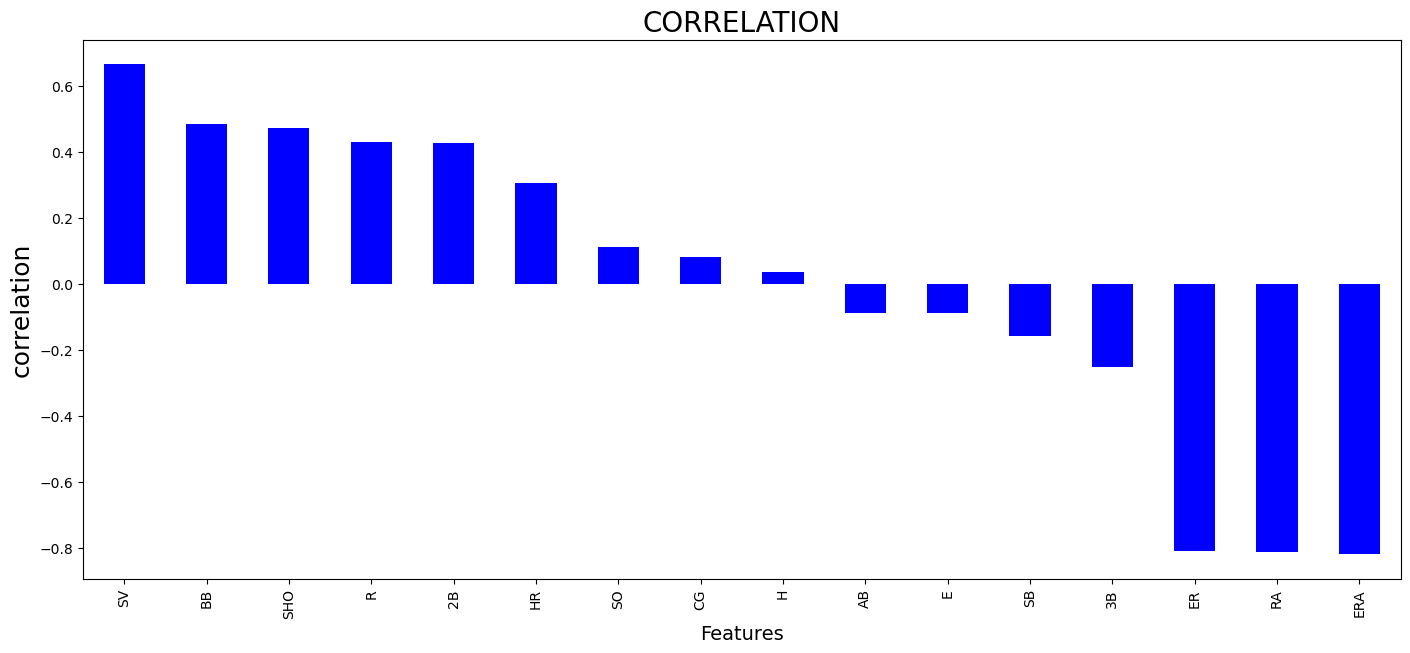

In [26]:
# check positive or negative correlation 
plt.figure(figsize=(17,7))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

SV, BB and SHO are the highest positively correlated features, and ER, RA and ERA are the highest negatively correlated. 
ER and ERA are very similar. They're both 81% negatively correlated and refer to almost the same thing. I may remove one of these features, but not both as I don't want to lose too much data. 

In [27]:
#descriptive stats
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This shows that there is very little difference in IQR, confirms that there is no missing data, and that we are working with large values within the dataset. No abnormalities between mean and median.

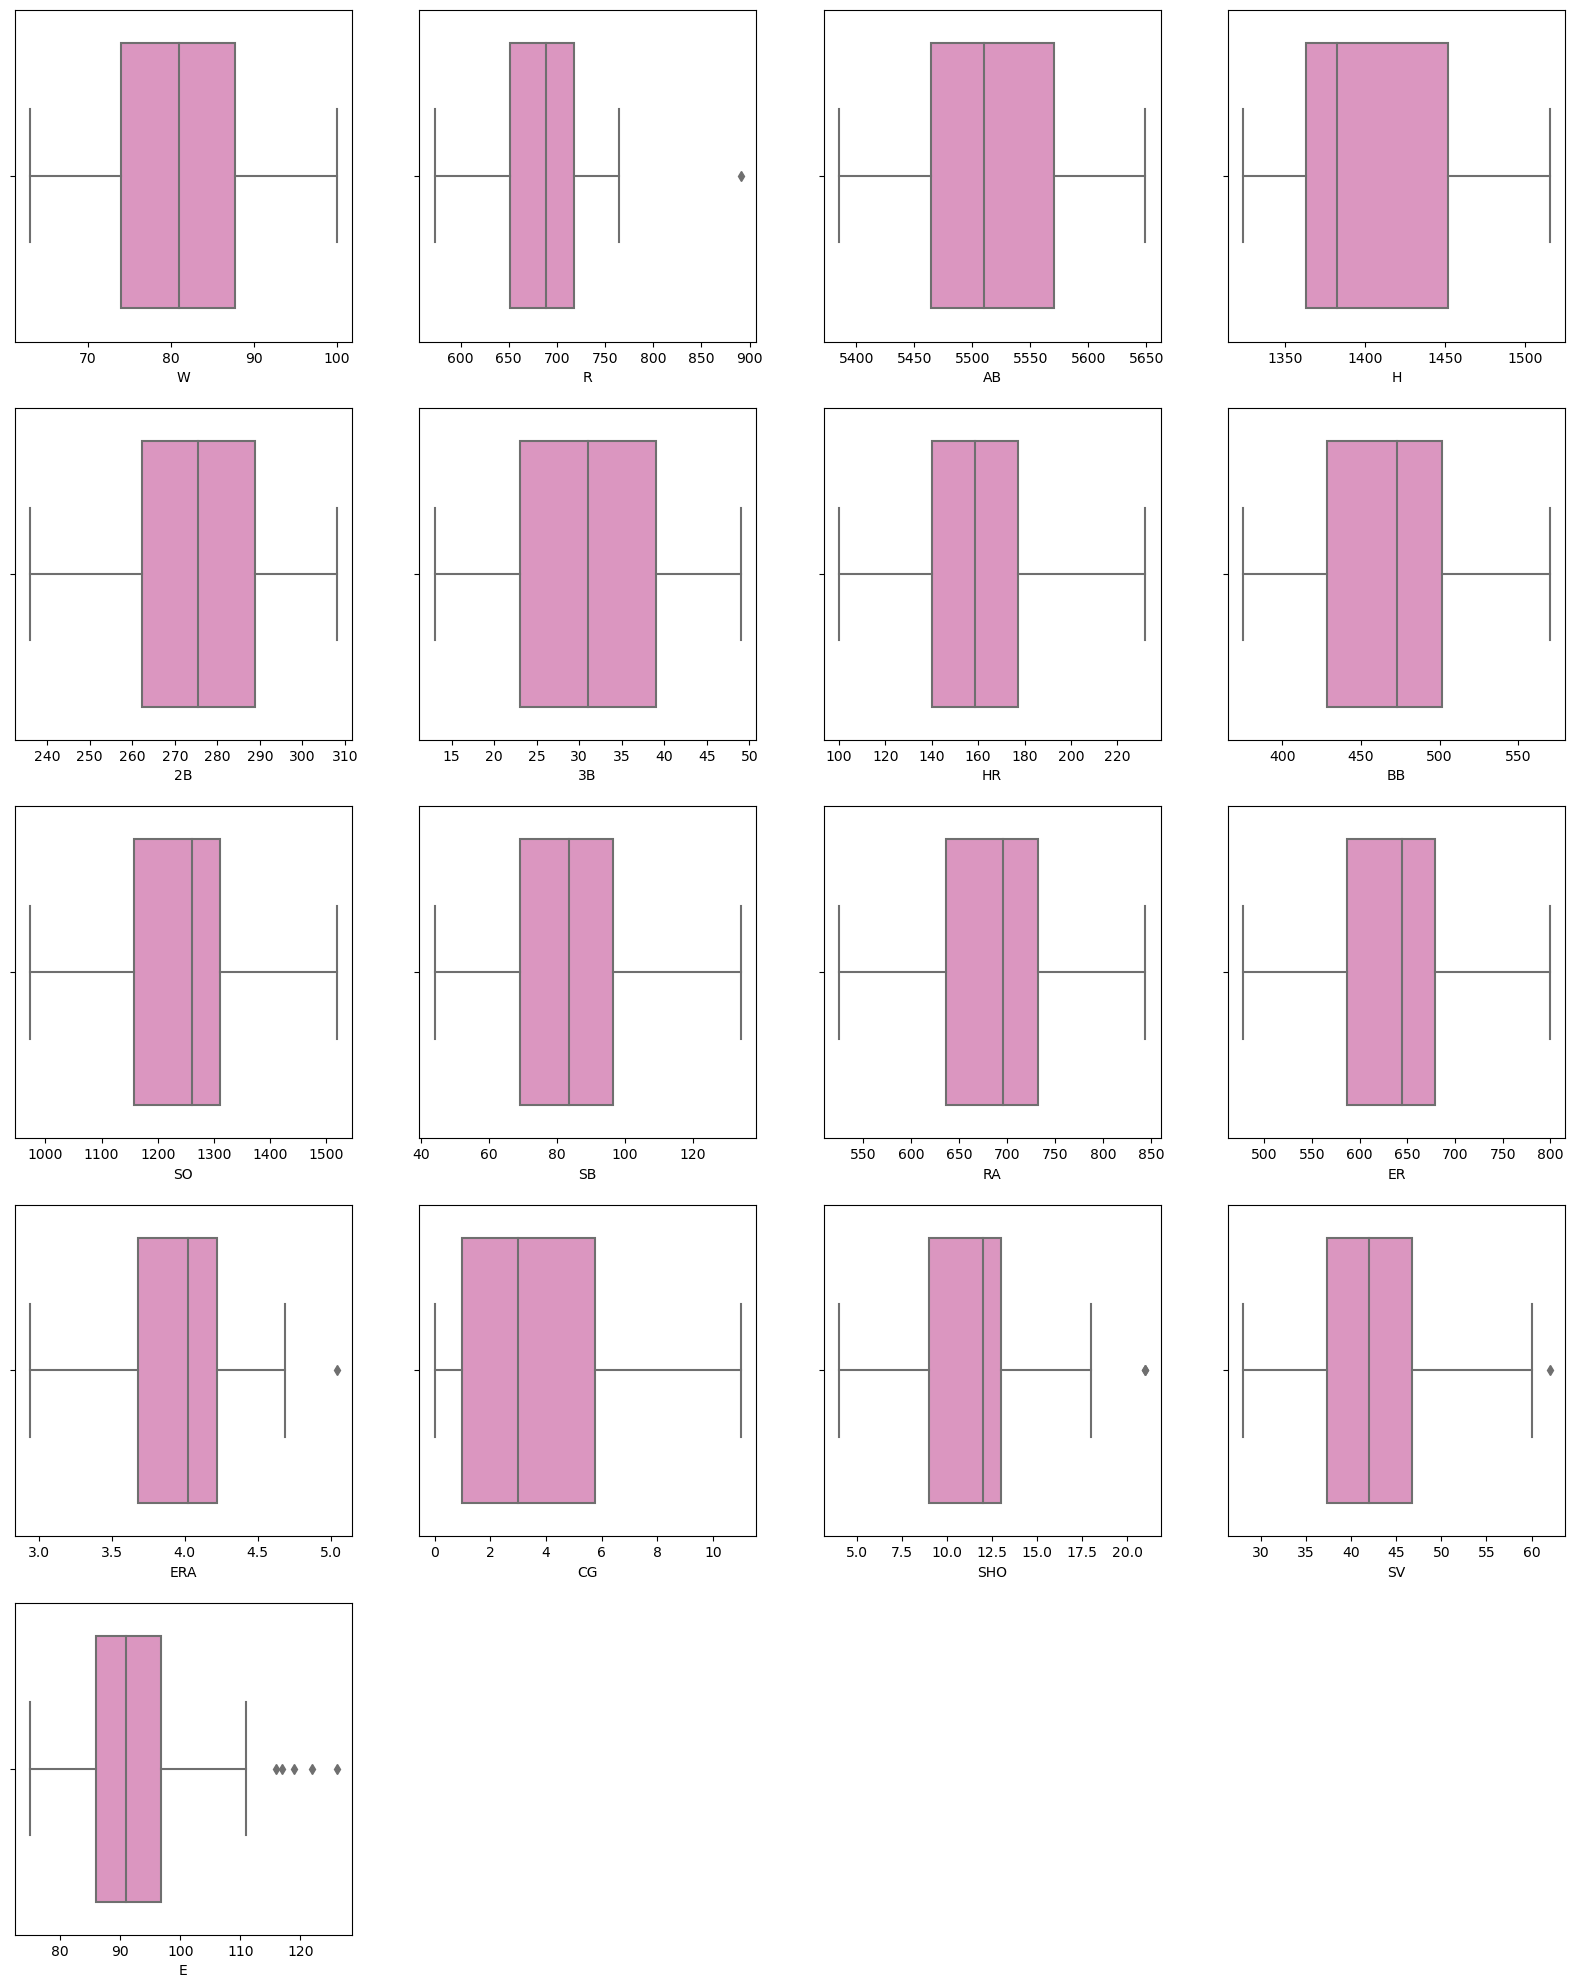

In [34]:
#Exploring outliers
plt.figure(figsize=(20,25))
p=1
for i in data:
    if p<=18:
        plt.subplot(5,4,p)
        sns.boxplot(data[i], palette='Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

Outliers present in 'E', 'ERA', 'SHO', 'SV' and 'R'

In [51]:
# Remove outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [47]:
data1=data[(z<3).all(axis=1)]

In [48]:
data1.shape

(29, 17)

In [50]:
Data_lost=((30-29)/30)*100
Data_lost

3.3333333333333335

3.3% of data lost, which is good.

In [56]:
#Handling skewness in 'SV', 'SHO', 'R', 'H', 'CG' and 'E'
from scipy.stats import yeojohnson
data1['SV'],_ = yeojohnson(data1['SV'])

In [57]:
data1['SHO'],_ = yeojohnson(data1['SHO'])

In [58]:
data1['R'],_ = yeojohnson(data1['R'])

In [59]:
data1['H'],_ = yeojohnson(data1['H'])

In [65]:
data1['CG'],_ = yeojohnson(data1['CG'])

In [62]:
data1['E'],_ = yeojohnson(data1['E'])

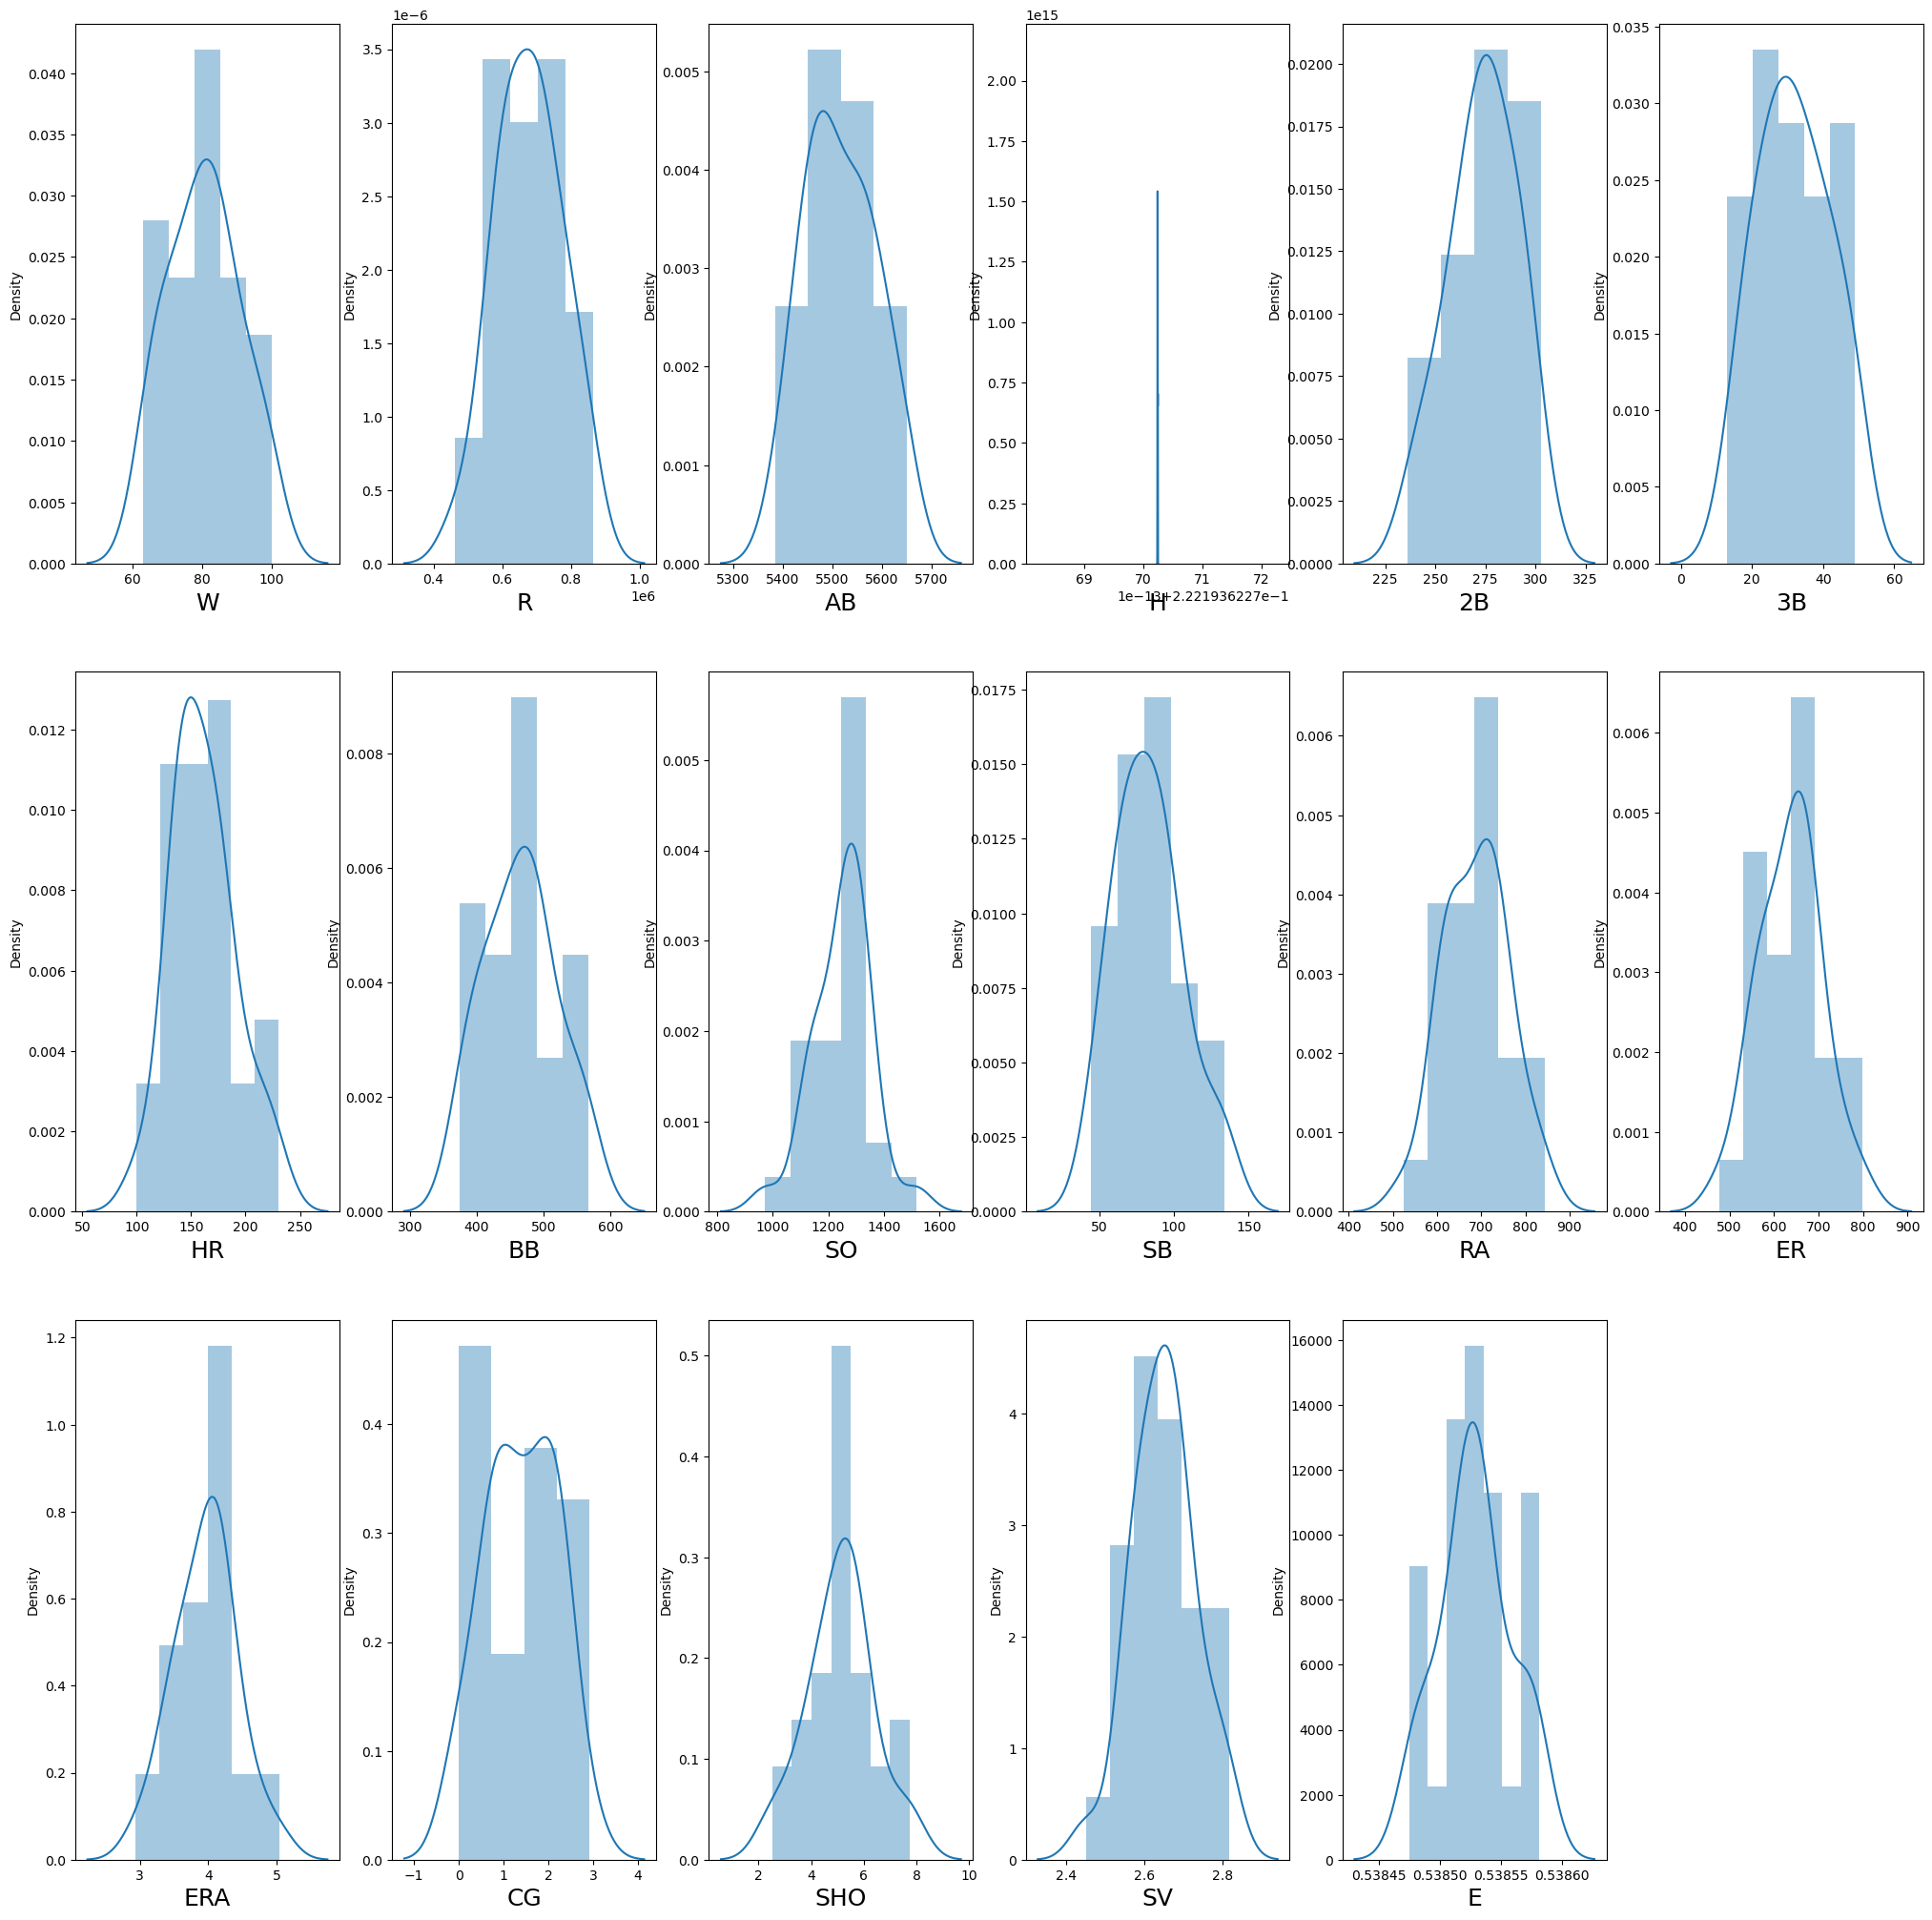

In [66]:
#Use distplots to check distribution of the data again
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 18:
        ax = plt.subplot(3, 6, plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


In [67]:
#Confirming skewness
data1.skew()

W      0.119013
R     -0.024842
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.119340
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

skewness reduced. All data normally distributed now

In [68]:
#Removing feature previously mentioned with negative correlation 
data1=data1.drop(['ER'], axis=1)

In [69]:
data1.shape

(29, 16)

In [71]:
x=data1.drop (columns=['W'], axis=1)
y=data1['W']

In [72]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data1)
x_scaled

array([[ 1.41602548e+00,  9.62543504e-01,  8.30084222e-01,
         4.16333634e-16,  1.55653766e+00,  1.01084549e+00,
        -7.65863143e-01, -1.53635899e+00, -2.72762331e+00,
         9.05952902e-01, -6.64513529e-01, -5.11388277e-01,
        -2.85663058e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.39947038e-01,  2.98863300e-01, -7.02830744e-01,
        -2.49800181e-16,  2.01171316e-01,  1.20891656e+00,
        -1.81388639e-01, -4.95020511e-01,  1.21895521e-01,
        -5.85315147e-01,  1.54638235e-01,  2.38952260e-01,
        -2.85663058e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [ 4.39339646e-02, -3.12105130e-01, -1.10025314e+00,
         0.00000000e+00,  1.73332457e+00, -2.76616501e-01,
        -6.97101437e-01,  1.25294051e+00, -9.25865699e-01,
         1.16458052e-01, -6.78397458e-01, -6.43801313e-01,
         1.95291941e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-4.46098718e-01, -1.30829774e

#Addressing the multicollinearity observed in the heatmap


In [77]:
# Calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)


   Variable           VIF
0         R  4.287794e+00
1        AB  3.313264e+00
2         H  6.176434e+08
3        2B  3.173623e+00
4        3B  3.022548e+00
5        HR  4.924937e+00
6        BB  3.283039e+00
7        SO  2.780331e+00
8        SB  1.676513e+00
9        RA  1.232769e+02
10      ERA  1.177376e+02
11       CG  2.372009e+00
12      SHO  3.101345e+00
13       SV  2.421022e+00
14        E  1.791368e+00


VIF scores not as high as anticipated

In [82]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [83]:
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[ 0.73903246 -0.2388707   0.63249079  0.65774651  0.83342958]
0.5247657264656904


In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[ 0.56980955 -0.24139991  0.50819848  0.5046487   0.46933282]
0.3621179268239176


Based on CV, I will choose linear regression model

In [89]:
lr.fit(x_train, y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.9438149394417854
R-squared Test: 0.9180312344132864


In [90]:
print('Mean absolute error:',mean_absolute_error(y_test, pred_test) )
print('Mean squared error:',mean_squared_error(y_test, pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_test)))

Mean absolute error: 3.0786485771868684
Mean squared error: 14.062197118431756
Root mean squared error: 3.7499596155734474


In [91]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
regression2 = LinearRegression()


In [96]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regression2.fit(x_train, y_train)
    y_pred = regression2.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)
print("Mean Squared Error per fold:", mse_scores)
print("Average Mean Squared Error:", average_mse)


Mean Squared Error per fold: [23.852385865538327, 45.75164904301821, 32.00307639560244, 61.653788712288225, 18.37563066200648, 23.852385865538327, 45.75164904301821, 32.00307639560244, 61.653788712288225, 18.37563066200648]
Average Mean Squared Error: 36.32730613569073


In [94]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
7,81,78.860001
8,80,88.863607
11,86,87.193746
15,100,100.417178
20,90,87.328676


I'm going to use hyperparameter tuning to improve these scores

In [95]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [98]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Best Hyperparameters: {'fit_intercept': True, 'normalize': False}
Mean Squared Error on Test Set: 18.37563066200648


In [99]:
lr=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0, normalize=False,positive=True)
lr.fit(x_train,y_train)
lr_score_training = lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
lr_score_training*100

86.26548601689137

In [104]:
import pickle
filename= 'Baseball.pkl'
pickle.dump(lr, open(filename,'wb'))
loaded_model= pickle.load(open('Baseball.pkl', 'rb'))

In [105]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
7,81,78.860001
8,80,88.863607
11,86,87.193746
15,100,100.417178
20,90,87.328676
